# Librosa - audio and music processing in Python
#### librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.
[visit official website](https://librosa.org/)

In [1]:
import librosa
import pandas
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# librosa.load
#### Load an audio file as a floating point time series.
#### Audio will be automatically resampled to the given rate (default sr=22050).

- sr: number > 0 [scalar]

    - target sampling rate

    - ‘None’ uses the native sampling rate
- mono: bool

    - convert signal to mono
- offset: float

    - start reading after this time (in seconds)
- duration: float

    - only load up to this much audio (in seconds)

In [23]:
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename, sr=11025)

#  Play Audio

In [68]:
ipd.Audio(filename)

In [24]:
print(f" y: {y} \n\n size: {y.shape} \n\n sr[HZ]: {sr}HZ")

 y: [-7.5784698e-04 -4.6251714e-04  2.7791597e-04 ...  1.3354227e-05
 -1.3452617e-05 -5.9224476e-08] 

 size: (58801,) 

 sr[HZ]: 11025HZ


# librosa.to_mono
#### Convert an audio signal to mono by averaging samples across channels.
- y: np.ndarray [shape=(…, n)]
    - audio time series. Multi-channel is supported.
- y_mono: np.ndarray [shape=(n,)]
    - y as a monophonic time-series



In [30]:
y_mono = librosa.to_mono(y)
print(y_mono)

[-1.4068222e-03 -4.4607258e-04 -4.1098078e-04 ...  7.9623051e-06
 -3.0417003e-05  1.2765067e-05]


# librosa.get_duration
#### Compute the duration (in seconds) of an audio time series, feature matrix, or filename.

In [32]:
duartion = librosa.get_duration(y=y, sr=sr)
print(duartion, 'seconds')

5.333378684807256 seconds


# librosa.get_samplerate
#### Get the sampling rate for a given file.

In [34]:
rate = librosa.get_samplerate(filename)
print(rate, 'Hz')

22050 Hz


In [45]:
df = pandas.DataFrame(y)
df

,0
0,-0.001407
1,-0.000446
2,-0.000411
3,0.000100
4,0.000043
...,...
117596,0.000009
117597,-0.000014
117598,0.000008
117599,-0.000030


To get diuration

# Visualisation

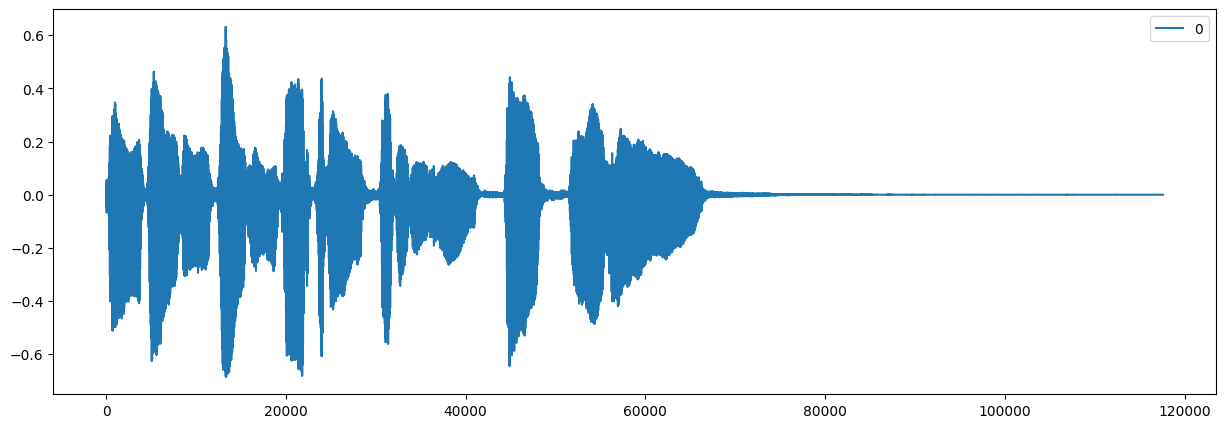

In [46]:
df.plot(figsize=(15, 5))
plt.show()

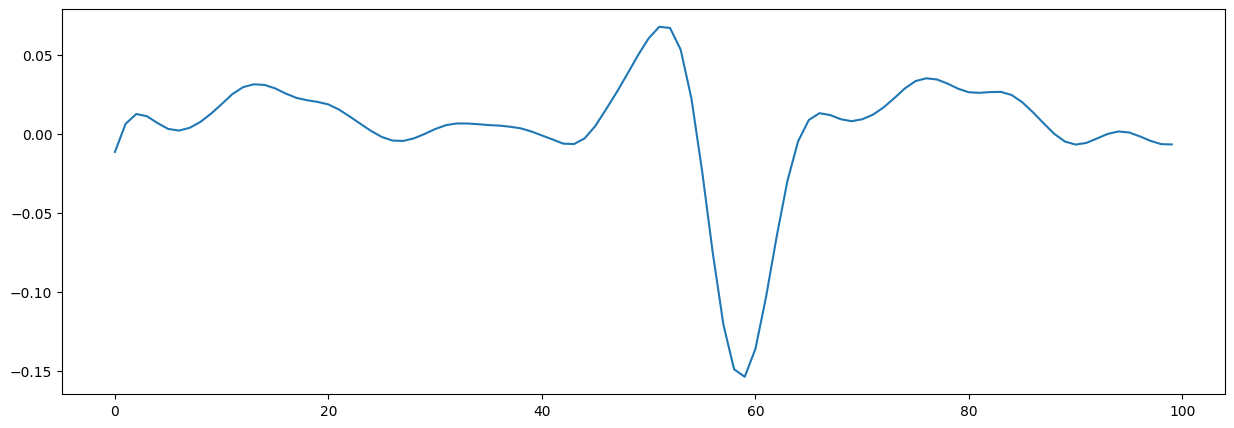

In [49]:
pandas.Series(y[40000:40100]).plot(figsize=(15, 5))
plt.show()

# librosa.lpc

#### Linear Prediction Coefficients via Burg’s method

#### This function applies Burg’s method to estimate coefficients of a linear filter on _y_ of order _order_. Burg’s method is an extension to the Yule-Walker approach, which are both sometimes referred to as LPC parameter estimation by autocorrelation.

#### It follows the description and implementation approach described in the introduction by Marple. 1 N.B. This paper describes a different method, which is not implemented here, but has been chosen for its clear explanation of Burg’s technique in its introduction.

## Parametrs

- y: np.ndarray [shape=(…, n)]
    - Time series to fit. Multi-channel is supported..
- order: int > 0
    - Order of the linear filter
- axis: int
    - Axis along which to compute the coefficients

## Returns

- a: np.ndarray [shape=(…, order + 1)]

    - LP prediction error coefficients, i.e. filter denominator polynomial. Note that the length along the specified axis will be order+1.



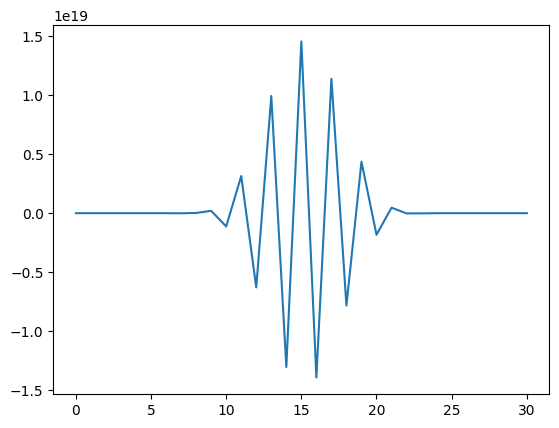

In [91]:
y, sr = librosa.load(librosa.ex('libri1'))
result = librosa.lpc(y, order=30)

plt.plot(result)
plt.show()


In [72]:
lpc = librosa.lpc(y=y, order=10)

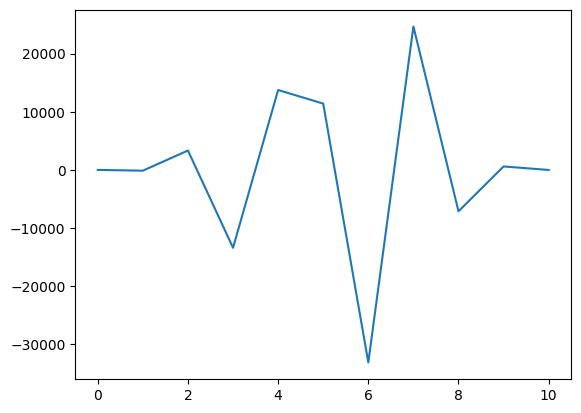

In [68]:
pandas.Series(lpc).plot()
plt.show()

# librosa.clicks (Construct a “click track”.)
#### This returns a signal with the signal __click__ sound placed at each specified time.


- times: np.ndarray or None
    - times to place clicks, in seconds
- frames: np.ndarray or None
    - frame indices to place clicks
- sr: number > 0
    - desired sampling rate of the output signal
- hop_length: int > 0
    - if positions are specified by frames, the number of samples between frames.
- click_freq: float > 0
    - frequency (in Hz) of the default click signal. Default is 1KHz.
- click_duration: float > 0
    - duration (in seconds) of the default click signal. Default is 100ms.
- click: np.ndarray or None
    - (optional) click signal sample to use instead of the default click. Multi-channel is supported.
- length: int > 0
    - desired number of samples in the output signal



In [92]:
y, sr = librosa.load(librosa.ex('choice'), duration=10)

# tracking beats its retuen the beat second
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print("Beats: ", beats)
y_beats = librosa.clicks(frames=beats, sr=sr)


Beats:  [  3  21  40  59  78  96 116 135 154 173 192 211 230 249 268 287 306 325
 344 363]


In [82]:
ipd.Audio(y, rate=sr)

In [83]:
ipd.Audio(y_beats, rate=sr)

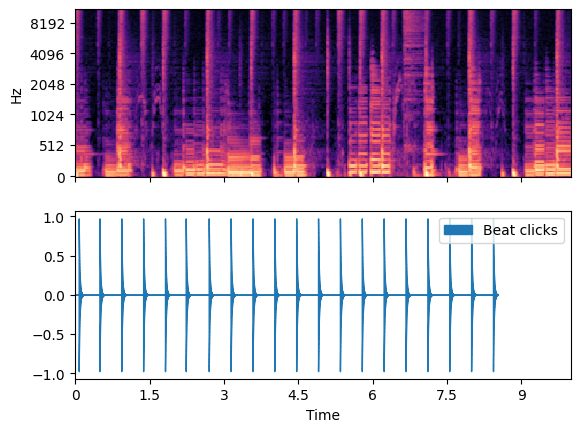

In [94]:
y_beats = librosa.clicks(frames=beats, sr=sr, length=len(y))
times = librosa.frames_to_time(beats, sr=sr)
y_beat_times = librosa.clicks(times=times, sr=sr)
y_beat_times880 = librosa.clicks(times=times, sr=sr, click_freq=880, click_duration=0.5)
fig, ax = plt.subplots(nrows=2, sharex=True)

S = librosa.feature.melspectrogram(y=y, sr=sr)

librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', ax=ax[0])

librosa.display.waveshow(y_beat_times, sr=sr, label='Beat clicks', ax=ax[1])

ax[1].legend()

ax[0].label_outer()

ax[0].set_title(None)

ipd.Audio(y_beat_times880, rate=sr)

## Spectral representations
## Here the list of Spectral
- stft : Short-time Fourier transform (STFT).

- istft : Inverse short-time Fourier transform (ISTFT).

- reassigned_spectrogram : Time-frequency reassigned spectrogram.

- cqt : Compute the constant-Q transform of an audio signal.

- icqt : Compute the inverse constant-Q transform.

- hybrid_cqt : Compute the hybrid constant-Q transform of an audio signal.

- pseudo_cqt : Compute the pseudo constant-Q transform of an audio signal.

- vqt : Compute the variable-Q transform of an audio signal.

- iirt : Time-frequency representation using IIR filters

- fmt : The fast Mellin transform (FMT)

- magphase : Separate a complex-valued spectrogram D into its magnitude (S) and phase (P) components, so that D = S * P.

In [77]:
# Short-time Fourier transform (STFT).
stft = librosa.stft(y=y)
df = pandas.DataFrame(stft)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411
0,-10.221706+0.000000j,-7.819523+0.000000j,2.719079+0.000000j,6.137878+0.000000j,7.734288+0.000000j,6.720403+0.000000j,3.616692+0.000000j,3.066023+0.000000j,4.115757+0.000000j,2.829866+0.000000j,...,0.683664+0.000000j,1.114930+0.000000j,-0.635546+0.000000j,-2.986892+0.000000j,-0.439045+0.000000j,5.443261+0.000000j,5.420744+0.000000j,-2.285934+0.000000j,-6.375077+0.000000j,-1.545114+0.000000j
1,7.624020-5.490186j,5.909651+7.860561j,-3.663568+2.600711j,-3.111660+0.456539j,-3.335859+1.154801j,-5.493903-2.181002j,0.594737-0.847614j,-2.641128+0.282646j,-1.722290+0.830319j,-2.227235-2.043701j,...,-0.782791+1.224426j,-0.261327-0.720758j,-0.712351-1.009696j,2.887412-1.312088j,1.357778+3.757931j,-4.585737+1.981281j,-3.850195-1.894238j,1.487773-5.715823j,5.519410+1.668304j,-0.035246+3.260590j
2,-2.262771+6.444385j,-1.812868-7.166474j,2.286341+2.295159j,0.682987-1.075636j,-1.845032-0.233886j,4.182436+0.869984j,-4.911472-0.535751j,3.185617+1.540880j,-1.404165-2.941967j,0.460132+2.849178j,...,0.384609-2.717812j,-1.792311+2.362940j,3.202060+0.069993j,-1.768944-0.055556j,-2.069917-1.238635j,3.131358-0.243174j,-0.360640-1.279397j,0.035684+5.104910j,-1.711738-2.681632j,0.157325-1.261691j
3,-0.094983-3.548061j,-0.323314+1.636345j,-0.028002-2.644808j,-1.315647+1.155009j,1.053802-0.343038j,-2.346789+0.963848j,2.944840+0.828312j,-2.271638-1.465586j,1.333895+2.567491j,0.900228-2.127071j,...,0.979448+1.826309j,2.071105-2.837976j,-3.270805-0.296956j,0.255931+2.235378j,1.489741-0.303990j,-1.238216-0.016922j,2.345537+1.636854j,-0.143103-2.827977j,-1.029410+1.142545j,1.133820-0.370673j
4,-0.603728+2.151775j,-0.574613+0.940692j,0.151867+0.302794j,0.746001-0.215478j,0.482093-0.271656j,0.237090-0.813974j,-0.251494-0.606779j,0.294077+0.046852j,-0.506432-0.375785j,-0.638132+0.415862j,...,-1.465360-0.159431j,-0.819236+1.001682j,0.996574+0.183142j,0.197117-1.202234j,-0.786173-0.601620j,-0.244056-0.732933j,-0.777316-0.064220j,-0.329260+1.021264j,0.387399+0.453229j,-0.278299+0.727674j


# librosa.stft
#### Short-time Fourier transform (STFT).
#### The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.

- y: np.ndarray [shape=(…, n)], real-valued
    - input signal. Multi-channel is supported.
- n_fft: int > 0 [scalar]

    - length of the windowed signal after padding with zeros. The number of rows in the STFT matrix D is (1 + n_fft/2). The default value, n_fft=2048 samples, corresponds to a physical duration of 93 milliseconds at a sample rate of 22050 Hz, i.e. the default sample rate in librosa. This value is well adapted for music signals. However, in speech processing, the recommended value is 512, corresponding to 23 milliseconds at a sample rate of 22050 Hz. In any case, we recommend setting n_fft to a power of two for optimizing the speed of the fast Fourier transform (FFT) algorithm.
    
- hop_length: int > 0 [scalar]

    - number of audio samples between adjacent STFT columns. 
    - Smaller values increase the number of columns in D without affecting the frequency resolution of the STFT. If unspecified, defaults to win_length // 4 (see below).
- win_length: int <= n_fft [scalar]

    - Each frame of audio is windowed by window of length win_length and then padded with zeros to match n_fft. S
    - maller values improve the temporal resolution of the STFT (i.e. the ability to discriminate impulses that are closely spaced in time) at the expense of frequency resolution (i.e. the ability to discriminate pure tones that are closely spaced in frequency). This effect is known as the time-frequency localization trade-off and needs to be adjusted according to the properties of the input signal y.

    - If unspecified, defaults to win_length = n_fft.
- windows: tring, tuple, number, function, or np.ndarray [shape=(n_fft,)]

- dtypenp.dtype, optional

- pad_modestring or function


In [2]:
y, sr = librosa.load(librosa.ex('trumpet'))

S = np.abs(librosa.stft(y))

S

array([[1.9942820e-03, 1.6541169e-03, 1.0326018e-03, ..., 2.2956241e-08,
        1.3257916e-07, 1.3284748e-06],
       [9.8903512e-04, 1.4140727e-03, 1.0622480e-03, ..., 2.4817250e-08,
        1.0011818e-07, 1.3233257e-06],
       [2.9396438e-03, 2.8944321e-03, 1.5704620e-03, ..., 2.5810630e-08,
        1.1980789e-07, 1.3126956e-06],
       ...,
       [7.4059586e-04, 3.6674211e-04, 1.5639116e-06, ..., 3.3514755e-04,
        7.0654217e-04, 1.0672152e-03],
       [7.4104901e-04, 3.6792224e-04, 1.1698562e-06, ..., 2.4655956e-04,
        1.1782180e-04, 8.9619984e-04],
       [7.4160012e-04, 3.6976149e-04, 1.7626077e-06, ..., 1.9005344e-04,
        5.1085517e-04, 9.5983199e-04]], dtype=float32)

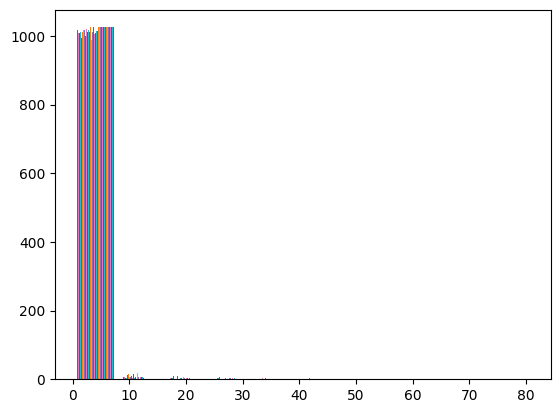

In [15]:
# Histogram 
plt.hist(S)
plt.show()

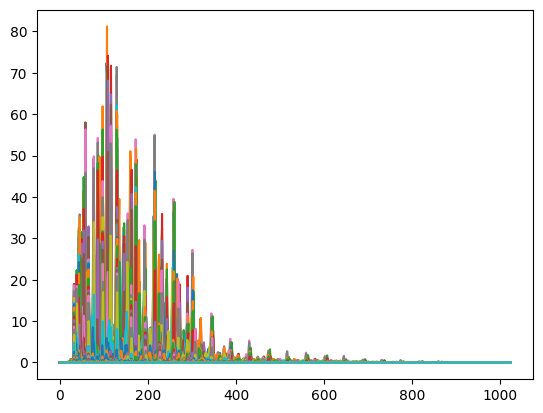

In [22]:
# Plot
plt.plot(S)
plt.show()

In [4]:
# Use left-aligned frames, instead of centered frames
S_left = librosa.stft(y, center=False)
S_left

array([[ 1.03260181e-03+0.0000000e+00j,  5.33705635e-04+0.0000000e+00j,
         4.07880667e-04+0.0000000e+00j, ...,
        -7.48257101e-09+0.0000000e+00j, -1.31959528e-08+0.0000000e+00j,
        -2.29562414e-08+0.0000000e+00j],
       [ 4.10161447e-04-9.7986648e-04j, -7.33276247e-04+4.6837571e-04j,
         2.90369295e-04-5.9223408e-04j, ...,
         9.72512648e-09-5.2443405e-09j, -1.34692402e-09+5.4203358e-10j,
         2.22998668e-08-1.0890908e-08j],
       [-1.50425255e-03+4.5119316e-04j,  8.88306648e-04-9.4787800e-04j,
        -8.51475401e-04+1.1466398e-03j, ...,
        -8.45671533e-09+9.0349390e-09j,  1.14221885e-08-1.2260372e-08j,
        -1.64169087e-08+1.9916669e-08j],
       ...,
       [-9.72240386e-08-1.5608866e-06j,  1.19303240e-06+4.1938048e-07j,
        -1.41982454e-07+1.2926251e-08j, ...,
        -4.59096482e-05+6.5248632e-06j, -5.42507632e-06-6.1131577e-05j,
        -1.40795717e-04+3.0413887e-04j],
       [ 1.16985188e-06+3.1765734e-09j,  4.93062146e-07-7.5802672e-0

/home/nima/Projects/librosa/.venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


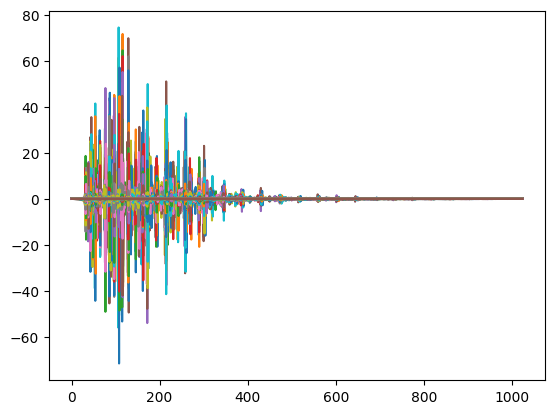

In [23]:
# Plot
plt.plot(S_left)
plt.show()

In [5]:
# Use a shorter hop length
D_short = librosa.stft(y, hop_length=64)
D_short

array([[ 1.9942820e-03+0.0000000e+00j,  2.0245612e-03+0.0000000e+00j,
         1.9468460e-03+0.0000000e+00j, ...,
        -1.6864499e-06+0.0000000e+00j, -1.7487555e-06+0.0000000e+00j,
        -1.7790215e-06+0.0000000e+00j],
       [-9.1873779e-04-3.6621204e-04j, -7.4869575e-04-3.3486905e-04j,
        -7.1706495e-04-2.1915924e-04j, ...,
         1.4982704e-06-7.6072627e-07j,  1.6798341e-06-4.7155021e-07j,
         1.7702059e-06-1.3792435e-07j],
       [ 4.9597578e-04+2.8975012e-03j, -1.0331715e-03+2.7302206e-03j,
        -2.3815148e-03+1.8284215e-03j, ...,
        -9.8341457e-07+1.3487212e-06j, -1.4770154e-06+9.0463061e-07j,
        -1.7408711e-06+2.7699392e-07j],
       ...,
       [-7.4053282e-04+9.6643362e-06j, -6.7336648e-04+2.8929638e-04j,
        -4.9612258e-04+5.0934788e-04j, ...,
         7.8239013e-04-5.4693053e-04j,  4.7231966e-04-7.4939081e-04j,
         1.3690813e-04-7.9165393e-04j],
       [ 7.4103830e-04-3.9883212e-06j,  7.1856065e-04-1.4683482e-04j,
         6.5643748e-04

## Display a spectrogram

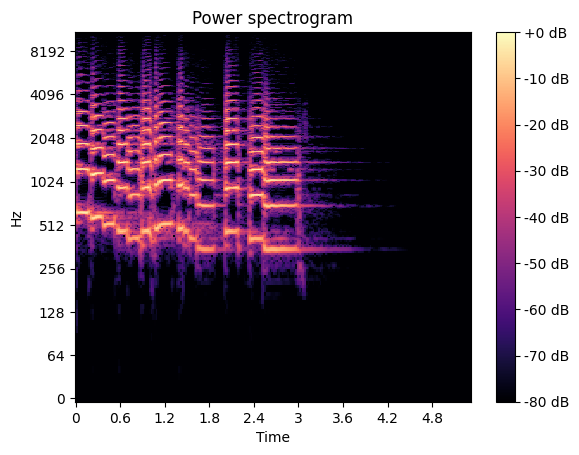

In [7]:
fig, ax = plt.subplots()

img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax)

ax.set_title('Power spectrogram')

fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

/tmp/ipykernel_31864/1898783856.py:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(D_short, ref=np.max), y_axis='log', x_axis='time', ax=ax)


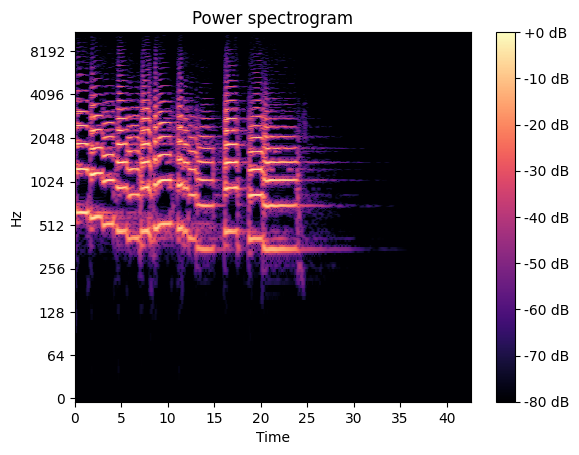

In [27]:
fig, ax = plt.subplots()

img = librosa.display.specshow(librosa.amplitude_to_db(D_short, ref=np.max), y_axis='log', x_axis='time', ax=ax)

ax.set_title('Power spectrogram')

fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

# librosa.fmt
#### The fast Mellin transform (FMT)

#### The Mellin of a signal y is performed by interpolating y on an exponential time axis, applying a polynomial window, and then taking the discrete Fourier transform.

#### When the Mellin parameter (beta) is 1/2, it is also known as the scale transform. 1 The scale transform can be useful for audio analysis because its magnitude is invariant to scaling of the domain (e.g., time stretching or compression). This is analogous to the magnitude of the Fourier transform being invariant to shifts in the input domain.

In [52]:
# Generate a signal and time-stretch it (with energy normalization)

scale = 1.25

freq = 3.0

x1 = np.linspace(0, 1, num=1024, endpoint=False)

x2 = np.linspace(0, 1, num=int(scale * len(x1)), endpoint=False)

y1 = np.sin(2 * np.pi * freq * x1, dtype=np.float64)

y2 = np.sin(2 * np.pi * freq * x2) / np.sqrt(scale, dtype=np.float64)

# Verify that the two signals have the same energy

np.sum(np.abs(y1)**2), np.sum(np.abs(y2)**2)

scale1 = librosa.fmt(y1, n_fmt=512)
print('scale1', scale1[0:10])

scale2 = librosa.fmt(y2, n_fmt=512)
print('scale2', scale2[:10])

scale1 [ 1.00921439+0.j         -1.26295492+0.59864453j -0.04900791-1.19648124j
  0.91871499+0.4637599j  -0.63122446+1.15407658j -1.41962732-0.1206146j
 -0.56423497-1.13863296j  0.59304935-0.86756571j  0.98030016+0.12839772j
  0.53552897+0.9797394j ]
scale2 [ 0.98172038+0.j         -1.18290679+0.6521326j  -0.18152493-1.17221143j
  0.94573691+0.28852872j -0.42426686+1.17334569j -1.38313631+0.09482563j
 -0.75426792-1.02250862j  0.39246808-0.98176449j  0.94936418-0.11123209j
  0.68902657+0.78352441j]


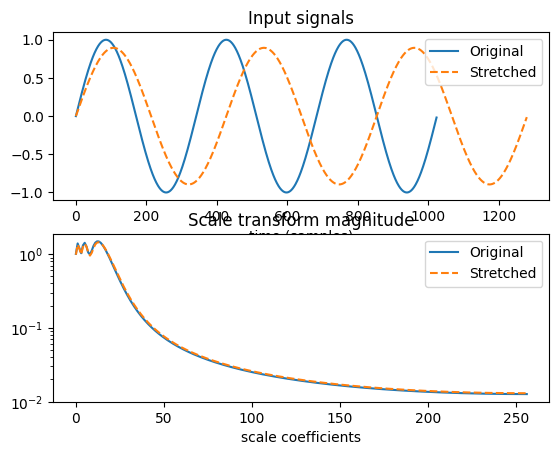

In [54]:
# And plot the results

fig, ax = plt.subplots(nrows=2)

ax[0].plot(y1, label='Original')

ax[0].plot(y2, linestyle='--', label='Stretched')

ax[0].set(xlabel='time (samples)', title='Input signals')

ax[0].legend()

ax[1].semilogy(np.abs(scale1), label='Original')

ax[1].semilogy(np.abs(scale2), linestyle='--', label='Stretched')

ax[1].set(xlabel='scale coefficients', title='Scale transform magnitude')

ax[1].legend()
plt.show()

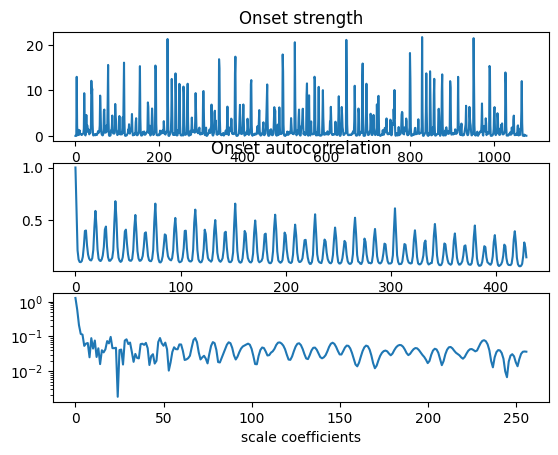

In [58]:
# Plot the scale transform of an onset strength autocorrelation

y, sr = librosa.load(librosa.ex('choice'))

odf = librosa.onset.onset_strength(y=y, sr=sr)

# Auto-correlate with up to 10 seconds lag

odf_ac = librosa.autocorrelate(odf, max_size=10 * sr // 512)

# Normalize

odf_ac = librosa.util.normalize(odf_ac, norm=np.inf)

# Compute the scale transform

odf_ac_scale = librosa.fmt(librosa.util.normalize(odf_ac), n_fmt=512)

# Plot the results

fig, ax = plt.subplots(nrows=3)

ax[0].plot(odf, label='Onset strength')

ax[0].set(xlabel='Time (frames)', title='Onset strength')

ax[1].plot(odf_ac, label='Onset autocorrelation')

ax[1].set(xlabel='Lag (frames)', title='Onset autocorrelation')

ax[2].semilogy(np.abs(odf_ac_scale), label='Scale transform magnitude')

ax[2].set(xlabel='scale coefficients')
plt.show()

# librosa.display.waveshow
#### Visualize a waveform in the time domain.

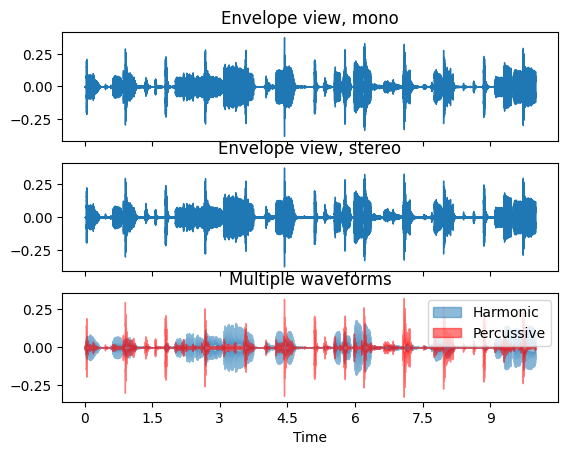

In [64]:
# Plot a monophonic waveform with an envelope view
y, sr = librosa.load(librosa.ex('choice'), duration=10)

fig, ax = plt.subplots(nrows=3, sharex=True)

librosa.display.waveshow(y, sr=sr, ax=ax[0])

ax[0].set(title='Envelope view, mono')

ax[0].label_outer()

# Or a stereo waveform
y, sr = librosa.load(librosa.ex('choice', hq=True), mono=False, duration=10)

librosa.display.waveshow(y, sr=sr, ax=ax[1])

ax[1].set(title='Envelope view, stereo')

ax[1].label_outer()

# Or harmonic and percussive components with transparency

y, sr = librosa.load(librosa.ex('choice'), duration=10)

y_harm, y_perc = librosa.effects.hpss(y)

librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')

librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')

ax[2].set(title='Multiple waveforms')

ax[2].legend()


plt.show()

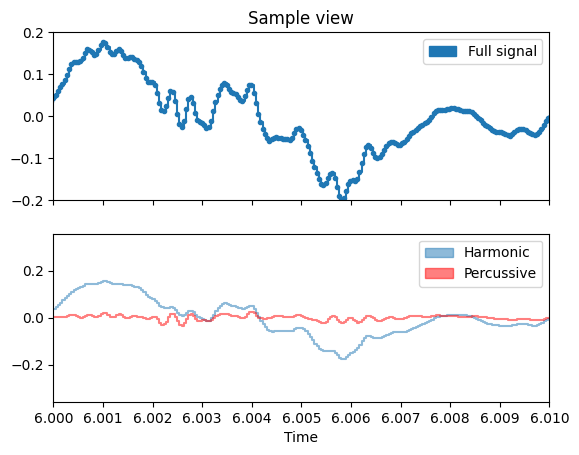

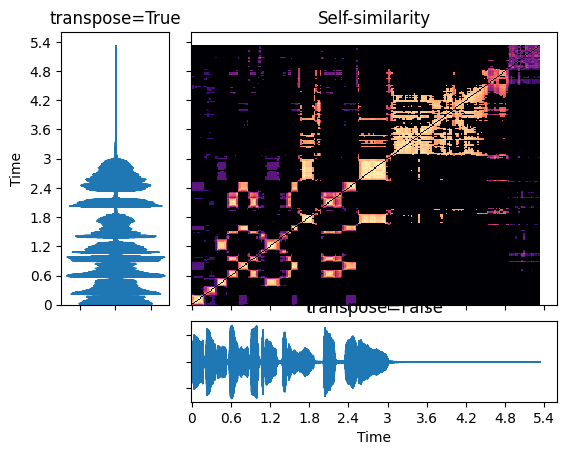

In [65]:
# Zooming in on a plot to show raw sample values
fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True)

ax.set(xlim=[6.0, 6.01], title='Sample view', ylim=[-0.2, 0.2])

librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')

librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')

librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')

ax.label_outer()

ax.legend()

ax2.legend()

# Plotting a transposed wave along with a self-similarity matrix

fig, ax = plt.subplot_mosaic("hSSS;hSSS;hSSS;.vvv")

y, sr = librosa.load(librosa.ex('trumpet'))

chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

sim = librosa.segment.recurrence_matrix(chroma, mode='affinity')

librosa.display.specshow(sim, ax=ax['S'], sr=sr,

                         x_axis='time', y_axis='time',

                         auto_aspect=False)

ax['S'].label_outer()

ax['S'].sharex(ax['v'])

ax['S'].sharey(ax['h'])

ax['S'].set(title='Self-similarity')

librosa.display.waveshow(y, ax=ax['v'])

ax['v'].label_outer()

ax['v'].set(title='transpose=False')

librosa.display.waveshow(y, ax=ax['h'], transpose=True)

ax['h'].label_outer()

ax['h'].set(title='transpose=True')

plt.show()